In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service as ChromeService
from bs4 import BeautifulSoup
import time

def is_social_media_or_wikipedia(url):
    return any(domain in url for domain in ['twitter', 'facebook', 'instagram', 'linkedin', 'pinterest', 'wikipedia'])

def get_google_search_links(keyword, num_results):
    url = f"https://www.google.com/search?q={keyword}"

    chrome_service = ChromeService(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to your chromedriver executable
    chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')  # Run Chrome in headless mode to hide the browser window
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

    try:
        driver.get(url)

        # Scroll down the page to load more results
        for _ in range(num_results // 10):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)

        # Get the page source containing search results
        page_source = driver.page_source

        # Extract URL links from the search results
        from bs4 import BeautifulSoup
        soup = BeautifulSoup(page_source, 'html.parser')
        links = []
        for result in soup.find_all('div', class_='tF2Cxc'):
            link = result.find('a')
            if link:
                link_url = link['href']
                if not is_social_media_or_wikipedia(link_url):
                    links.append(link_url)

        return links[:num_results]

    except Exception as e:
        print(f"Error: {e}")
        return []

    finally:
        driver.quit()
article_links = []
def main():
    keywords = input("Enter the keywords to search (comma-separated): ").split(',')
    num_results = int(input("Enter the number of links to scrape: "))

    for keyword in keywords:

        article_link = get_google_search_links(keyword, num_results)
        article_links.append(article_link)



    print(f"URL links from Google search results for '{keywords}':")
    for idx, link in enumerate(article_links, 1):
        print(f"{idx}. {link}")

if __name__ == "__main__":
    main()

Enter the keywords to search (comma-separated):  modi news article, bjp news article, indian national congress news article, rahul gandhi news article
Enter the number of links to scrape:  30


URL links from Google search results for '['modi news article', ' bjp news article', ' indian national congress news article', ' rahul gandhi news article']':
1. ['https://indianexpress.com/about/narendra-modi/', 'https://www.narendramodi.in/news', 'https://www.pmsangrahalaya.gov.in/prime-ministers-of-india#:~:text=Shri%20Narendra%20Modi%20is%20the,serving%20Prime%20Minister%20of%20India.', 'https://www.bbc.com/news/topics/cg41ylwvgmyt']
2. ['https://economictimes.indiatimes.com/topic/bjp', 'https://www.hindustantimes.com/india-news/abrogation-article-370-35a-bjp-ministers-leaders-jammu-and-kashmir-narendra-modi-101691210429778.html', 'https://indianexpress.com/about/bjp/', 'https://www.thehindu.com/topic/bharatiya-janata-party/', 'https://www.business-standard.com/topic/bjp', 'https://theconversation.com/global/topics/bjp-9785', 'https://zeenews.india.com/tags/bjp.html', 'https://www.firstpost.com/tag/bjp', 'https://www.independent.co.uk/topic/bjp']
3. ['https://www.thehindu.com/topic

In [ ]:
!pip install wordcloud

In [ ]:
article_links
flattened_list = [element for sublist in article_links for element in sublist]
print(flattened_list)

['https://indianexpress.com/about/narendra-modi/', 'https://www.narendramodi.in/news', 'https://www.pmsangrahalaya.gov.in/prime-ministers-of-india#:~:text=Shri%20Narendra%20Modi%20is%20the,serving%20Prime%20Minister%20of%20India.', 'https://www.bbc.com/news/topics/cg41ylwvgmyt', 'https://economictimes.indiatimes.com/topic/bjp', 'https://www.hindustantimes.com/india-news/abrogation-article-370-35a-bjp-ministers-leaders-jammu-and-kashmir-narendra-modi-101691210429778.html', 'https://indianexpress.com/about/bjp/', 'https://www.thehindu.com/topic/bharatiya-janata-party/', 'https://www.business-standard.com/topic/bjp', 'https://theconversation.com/global/topics/bjp-9785', 'https://zeenews.india.com/tags/bjp.html', 'https://www.firstpost.com/tag/bjp', 'https://www.independent.co.uk/topic/bjp', 'https://www.thehindu.com/topic/indian-national-congress/', 'https://indianexpress.com/about/indian-national-congress/', 'https://www.thehindubusinessline.com/topic/indian-national-congress/', 'https:/

In [ ]:
!pip install transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/21/02/ae8e595f45b6c8edee07913892b3b41f5f5f273962ad98851dc6a564bbb9/transformers-4.31.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/116.9 kB ? eta -:--:--
     -------------------------------------- 116.9/116.9 kB 6.7 MB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub<1.0,>=0.14.1 from https://files.pythonhosted.org/packages/7f/c4/adcbe9a696c135578cabcbdd7331332daad4d49b7c43688bc2d36b3a47d2/huggingface_hub-0.16.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
     ------ --------------------------------- 0.6/3.5 MB 19.2 MB/s eta 0:00:01
     ----------- ---------------------------- 1.0/3.5 MB 13.1 MB/s eta 0:00:01
     ---------------- ----------------------- 1.4/3.5 MB 11.5 MB/s eta 0:00:01
     --------------------- ------------------ 1.9/3.5 MB 10.8 MB/s eta 0:00:01
     ----------------

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activat

[{'label': 'POSITIVE', 'score': 0.999457061290741},
 {'label': 'NEGATIVE', 'score': 0.9987302422523499}]

In [ ]:
!pip install TensorFlow

  Obtaining dependency information for TensorFlow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/d1/93/0f4cf5058095d749d464e4f770d2bf339930e5f3374331f0d2fa6ddfbf28/

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Enter the keyword to search:  election
Enter the number of article URLs to process:  90


News, Photos, Latest News Headlines about Narendra Modi
['stage', 'power', 'social', 'prime', 'headlines', 'photos', 'lok', 'latest', 'media', 'sabha', 'party', 'modi', 'narendra']
Narendra Damodardas Modi is the 15th Prime Minister of India and assumed office in May 2014 .
Since coming to power, Modi has single-handedly made BJP the most powerful party in the country with power in most of the state.
Narendra Modi is one of the most followed names on social media platforms like Facebook and Twitter.
Despite stiff opposition from party patriarch LK Advani, Modi was declared the prime ministerial candidate for Lok Sabha elections in 2014.
Narendra Modi has effectively utilized social media platforms to directly communicate with the citizens of India, bypassing traditional media channels.
[{'label': 'POSITIVE', 'score': 0.9992260932922363}]
Top Stories , Photos, Video - Narendramodi.in
['minister', 'prime', 'details', 'photos', 'various', 'video', 'modis', 'walks', 'narendramodiin', 'even

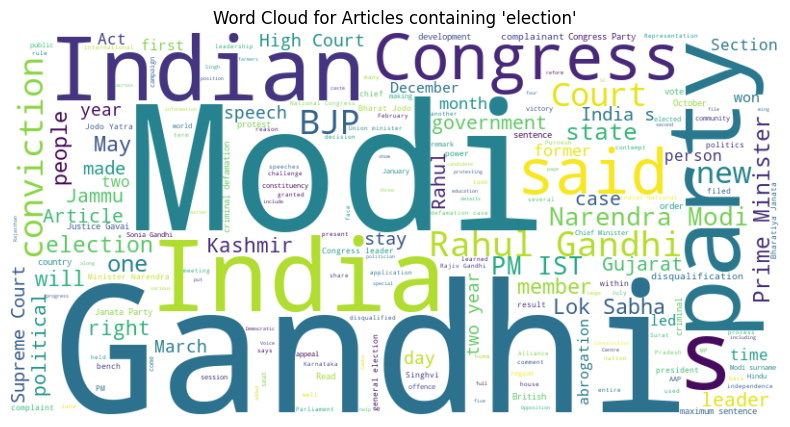

<Figure size 1000x1000 with 0 Axes>

In [ ]:
from newspaper import Article
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from newspaper import Config
from wordcloud import WordCloud
from collections import Counter
import nltk
import pandas as pd
import transformers
from transformers import pipeline
nltk.download('stopwords')
nltk.download('punkt')
df_articles = pd.DataFrame()
sentiment_pipeline = pipeline("sentiment-analysis")

from nltk.tokenizer import sent_tokenizer
text = "Hello everyone. Welcome to GeeksforGeeks. You are studying NLP article"



def get_article_text(url):
    user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'

    config = Config()
    config.browser_user_agent = user_agent
    config.request_timeout = 10

    try:



        article = Article(url)
        article.download()
        article.parse()
        article.nlp()
        #df_articles['title'] = article.title
        #df_articles['keywords'] = list(article.keywords)
        #df_articles['summary'] = article.summary

        #df_articles._append(df_articles)
        print(article.title)
        print(article.keywords)
        print(article.summary)


        print(sentiment_pipeline(article.summary))
        df_articles['title_cleaned'] = sentiment_pipeline(df_articles['title'])



        return article.text

    except Exception as e:

        print(f"Error: {e}")



def create_wordcloud(text, keyword):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Articles containing '{keyword}'")
    plt.show()
def main():
    global top_20_words

    keyword = input("Enter the keyword to search: ")
    num_results = int(input("Enter the number of article URLs to process: "))



    full_text = ""
    for url in flattened_list:
        text = get_article_text(url)
        try:


            full_text += text + "\n"


        except Exception as e:


            print(f"Error: {e}")

    # Assuming you already have the 'full_text' variable containing your text
    wordcloud = WordCloud()
    wordcloud.generate_from_text(full_text)
    word_frequencies = wordcloud.process_text(full_text)
    # Convert word_frequencies to a Counter object and get the top 10 most common words
    top_20_words = dict(Counter(word_frequencies).most_common(20))
    print(top_20_words)

    #print(WordCloud().process_text(full_text))
    create_wordcloud(full_text, keyword)
    plt.figure(figsize=(10,10))


if __name__ == "__main__":
    main()

In [ ]:
import nltk
import pandas as pd

nltk.download('stopwords')
nltk.download('punkt')


from nltk.tokenizer import sent_tokenizer
text = "Hello everyone. Welcome to GeeksforGeeks. You are studying NLP article"


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


ModuleNotFoundError: ignored

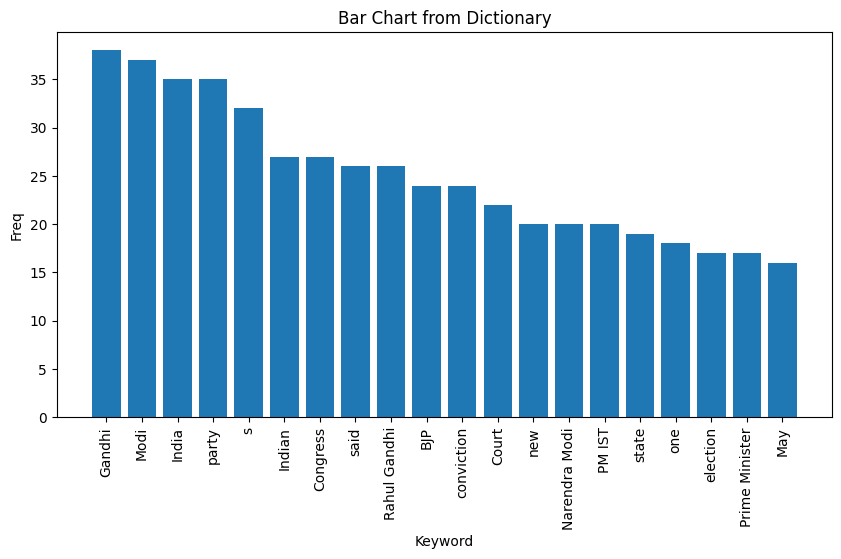

In [ ]:

Keyword = list(top_20_words.keys())
Freq = list(top_20_words.values())
plt.figure(figsize=(10, 5))
plt.xticks(rotation='vertical')

plt.bar(Keyword, Freq)

# Optionally, you can add labels and title
plt.xlabel('Keyword')
plt.ylabel('Freq')
plt.title('Bar Chart from Dictionary')

# Display the chart
plt.show()

In [ ]:
!pip install inflect

In [ ]:
#import the inflect library
import inflect
p=inflect.engine()

#convert number into words
def convert_number(text):
    #split string into list of words
    temp_str=text.split()
    #initialise empty list
    new_string=[]
    for word in temp_str:
        #if word is a digit,convert the digit
        #to numbers and append into the new_string list
        if word.isdigit():
            temp=p.number_to_words(word)
            new_string.append(temp)
            #append the word as it is
        else:
            new_string.append(word)
    #join the words of new string to form a string
    temp_str=' '.join(new_string)
    return temp_str

input_str='There are 3 balls in this bag, and 12 in the other one.'
print(convert_number(input_str))


There are three balls in this bag, and twelve in the other one.


IGNORE FROM BELOW

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service as ChromeService
from bs4 import BeautifulSoup
import time

def is_social_media_or_wikipedia(url):
    return any(domain in url for domain in ['twitter', 'facebook', 'instagram', 'linkedin', 'pinterest', 'wikipedia'])

def get_google_search_links(keyword, num_results):
    url = f"https://www.google.com/search?q={keyword}"

    chrome_service = ChromeService(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to your chromedriver executable
    chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')  # Run Chrome in headless mode to hide the browser window
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

    try:
        driver.get(url)

        # Scroll down the page to load more results
        for _ in range(num_results // 10):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)

        # Get the page source containing search results
        page_source = driver.page_source

        # Extract URL links from the search results
        from bs4 import BeautifulSoup
        soup = BeautifulSoup(page_source, 'html.parser')
        links = []
        for result in soup.find_all('div', class_='tF2Cxc'):
            link = result.find('a')
            if link:
                link_url = link['href']
                if not is_social_media_or_wikipedia(link_url):
                    links.append(link_url)

        return links[:num_results]

    except Exception as e:
        print(f"Error: {e}")
        return []

    finally:
        driver.quit()

def main():
    keyword = input("Enter the keyword to search: ")
    num_results = int(input("Enter the number of links to scrape: "))

    article_links = get_google_search_links(keyword, num_results)

    print(f"URL links from Google search results for '{keyword}':")
    for idx, link in enumerate(article_links, 1):
        print(f"{idx}. {link}")

if __name__ == "__main__":
    main()


In [ ]:
from urllib.parse import urlparse
from selenium import webdriver
import time
from langdetect import detect
from googletrans import Translator

def get_google_search_links(keyword, num_results=50):
    url = f"https://www.google.com/search?q={keyword}"

    # Set up Selenium webdriver with Chrome
    #driver = webdriver.Chrome(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to chromedriver.exe

    chrome_service = ChromeService(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to your chromedriver executable
    chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')  # Run Chrome in headless mode to hide the browser window
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)



    try:
        driver.get(url)

        # Scroll down the page to load more results
        for _ in range(num_results // 50):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)

        # Get the page source containing search results
        page_source = driver.page_source

        # Extract URL links from the search results
        from bs4 import BeautifulSoup
        soup = BeautifulSoup(page_source, 'html.parser')
        links = []
        for result in soup.find_all('div', class_='tF2Cxc'):
            link = result.find('a')
            if link:
                links.append(link['href'])

        return links[:num_results]

    except Exception as e:
        print(f"Error: {e}")
        return []

    finally:
        driver.quit()


def translate_page(driver, target_lang='en'):
    translator = Translator()

    # Get the page source
    page_source = driver.page_source

    # Detect the language of the page content
    src_lang = detect(page_source)

    # Translate the page content to the target language
    translated_page = translator.translate(page_source, src=src_lang, dest=target_lang)

    return translated_page.text

#TOP_NEWS_CHANNELS = ['indiatoday', 'thehindu', 'hindustantimes', 'timesofindia', 'ndtv', 'republicworld', 'indianexpress']
SOCIAL_MEDIA_DOMAINS = ['twitter', 'facebook', 'instagram', 'linkedin', 'pinterest','youtube']
WIKIPEDIA_DOMAIN = 'wikipedia'

def is_reputable_news_source(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return any(channel in domain for channel in TOP_NEWS_CHANNELS)

def is_social_media(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return any(social in domain for social in SOCIAL_MEDIA_DOMAINS)

def is_wikipedia(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return WIKIPEDIA_DOMAIN in domain

def get_article_details(links, keyword):
    chrome_service = ChromeService(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to your chromedriver executable
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--lang=en-US,en')

    chrome_options.add_argument('--disable-notifications')
    chrome_options.add_argument('--disable-popup-blocking')
    chrome_options.add_argument('--ignore-certificate-errors')
    chrome_options.add_argument('--disable-infobars')
    chrome_options.add_argument('--disable-web-security')
    chrome_options.add_argument('--allow-running-insecure-content')
    chrome_options.add_argument('--disable-gpu')
    #chrome_options.add_argument('--headless')  # Run Chrome in headless mode to hide the browser window
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

    article_details = []
    for link in links:
        try:
            driver.get(link)
            time.sleep(2)  # Add a delay to let the page load completely (you may adjust the delay as needed)

            title = driver.title
            if keyword.lower() in title.lower():  # Check if the keyword is in the article title (case-insensitive)
                if not is_social_media(link) and not is_wikipedia(link):




                    article_details.append((title, link))
                    print(article_details)


                    #article_details.append((title, link))

        except Exception as e:
            print(f"Error while accessing {link}: {e}")

    driver.quit()
    return article_details

def main():
    keywords = input("Enter the keywords to search (comma-separated): ").split(',')
    num_results = int(input("Enter the number of links to scrape: "))

    for keyword in keywords:
        article_links = get_google_search_links(keyword, num_results)
        article_details = get_article_details(article_links, keyword)

        print(f"\nArticle details for '{keyword}' from top news channels:")
        for idx, (title, url) in enumerate(article_details, 1):
            print(f"{idx}. Title: {title}")
            print(f"   URL: {url}")
            print()

if __name__ == "__main__":
    main()



In [ ]:
def get_news_article_links(keyword, num_results=10):
    chrome_service = ChromeService(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to your chromedriver executable
    chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')  # Run Chrome in headless mode to hide the browser window
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

    try:
        search_url = f'https://www.google.com/search?q={keyword}&tbm=nws&tbs=qdr:d'
        driver.get(search_url)

        # Scroll down the page to load more results
        for _ in range(num_results // 10):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)

        # Get the page source and parse with BeautifulSoup
        page_source = driver.page_source
        soup = BeautifulSoup(page_source, 'html.parser')

        # Extract news article links from search results
        links = []
        for result in soup.find_all('div', class_='tF2Cxc'):
            link = result.find('a')
            if link:
                links.append(link['href'])

        return links[:num_results]

    except Exception as e:
        print(f"Error: {e}")
        return []

    finally:
        driver.quit()

def main():
    keyword = input("Enter the keyword to search: ")
    num_results = int(input("Enter the number of links to scrape: "))

    article_links = get_news_article_links(keyword, num_results)

    print(f"News article links related to '{keyword}':")
    for idx, link in enumerate(article_links, 1):
        print(f"{idx}. {link}")

if __name__ == "__main__":
    main()


In [ ]:
from selenium import webdriver

def get_google_search_links(keyword, num_results=10):
    url = f"https://www.google.com/search?q={keyword}"

    # Set up Selenium webdriver with Chrome
    #driver = webdriver.Chrome(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to chromedriver.exe

    chrome_service = ChromeService(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to your chromedriver executable
    chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')  # Run Chrome in headless mode to hide the browser window
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)



    try:
        driver.get(url)

        # Scroll down the page to load more results
        for _ in range(num_results // 10):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)

        # Get the page source containing search results
        page_source = driver.page_source

        # Extract URL links from the search results
        from bs4 import BeautifulSoup
        soup = BeautifulSoup(page_source, 'html.parser')
        links = []
        for result in soup.find_all('div', class_='tF2Cxc'):
            link = result.find('a')
            if link:
                links.append(link['href'])

        return links[:num_results]

    except Exception as e:
        print(f"Error: {e}")
        return []

    finally:
        driver.quit()

def main():
    keyword = input("Enter the keyword to search: ")
    num_results = int(input("Enter the number of links to scrape: "))

    article_links = get_google_search_links(keyword, num_results)

    print(f"URL links from Google search results for '{keyword}':")
    for idx, link in enumerate(article_links, 1):
        print(f"{idx}. {link}")

if __name__ == "__main__":
    main()


In [ ]:
from selenium import webdriver
import time

def get_article_details(links):

    chrome_service = ChromeService(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to your chromedriver executable
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')  # Run Chrome in headless mode to hide the browser window
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

    article_details = []
    for link in links:
        try:
            driver.get(link)
            time.sleep(2)  # Add a delay to let the page load completely (you may adjust the delay as needed)

            title = driver.title
            article_details.append((title, driver.current_url))

        except Exception as e:
            print(f"Error while accessing {link}: {e}")

    driver.quit()
    return article_details

def main():
    keyword = input("Enter the keyword to search: ")
    num_results = int(input("Enter the number of links to scrape: "))

    article_links = get_google_search_links(keyword, num_results)
    article_details = get_article_details(article_links)

    print(f"Article details for '{keyword}':")
    for idx, (title, url) in enumerate(article_details, 1):
        print(f"{idx}. Title: {title}")
        print(f"   URL: {url}")
        print()

if __name__ == "__main__":
    main()


In [ ]:
from urllib.parse import urlparse
from selenium import webdriver
import time

TOP_NEWS_CHANNELS = ['indiatoday', 'thehindu', 'hindustantimes', 'timesofindia', 'ndtv', 'republicworld', 'indianexpress']

def is_reputable_news_source(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return any(channel in domain for channel in TOP_NEWS_CHANNELS)

def get_article_details(links):
    chrome_service = ChromeService(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to your chromedriver executable
    chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')  # Run Chrome in headless mode to hide the browser window
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

    article_details = []
    for link in links:
        try:
            if not is_reputable_news_source(link):
                continue

            driver.get(link)
            time.sleep(2)  # Add a delay to let the page load completely (you may adjust the delay as needed)

            title = driver.title
            article_details.append((title, link))

        except Exception as e:
            print(f"Error while accessing {link}: {e}")

    driver.quit()
    return article_details

def main():
    keyword = input("Enter the keyword to search: ")
    num_results = int(input("Enter the number of links to scrape: "))

    article_links = get_google_search_links(keyword, num_results)
    article_details = get_article_details(article_links)

    print(f"Article details from top news channels for '{keyword}':")
    for idx, (title, url) in enumerate(article_details, 1):
        print(f"{idx}. Title: {title}")
        print(f"   URL: {url}")
        print()

if __name__ == "__main__":
    main()


In [ ]:
from urllib.parse import urlparse
from selenium import webdriver
import time

TOP_NEWS_CHANNELS = ['indiatoday', 'thehindu', 'hindustantimes', 'timesofindia', 'ndtv', 'republicworld', 'indianexpress']

def is_reputable_news_source(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return any(channel in domain for channel in TOP_NEWS_CHANNELS)

def get_article_details(links, keyword):
    chrome_service = ChromeService(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to your chromedriver executable
    chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')  # Run Chrome in headless mode to hide the browser window
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

    article_details = []
    for link in links:
        try:
            driver.get(link)
            time.sleep(2)  # Add a delay to let the page load completely (you may adjust the delay as needed)

            title = driver.title
            if keyword.lower() in title.lower():  # Check if the keyword is in the article title (case-insensitive)
                if is_reputable_news_source(link):  # Check if the URL belongs to a reputable news source
                    article_details.append((title, link))

        except Exception as e:
            print(f"Error while accessing {link}: {e}")

    driver.quit()
    return article_details

def main():
    keyword = input("Enter the keyword to search: ")
    num_results = int(input("Enter the number of links to scrape: "))

    article_links = get_google_search_links(keyword, num_results)
    article_details = get_article_details(article_links, keyword)

    print(f"Article details from top news channels containing '{keyword}':")
    for idx, (title, url) in enumerate(article_details, 1):
        print(f"{idx}. Title: {title}")
        print(f"   URL: {url}")
        print()

if __name__ == "__main__":
    main()


In [ ]:
from urllib.parse import urlparse
from selenium import webdriver
import time
from langdetect import detect
from googletrans import Translator

def translate_page(driver, target_lang='en'):
    translator = Translator()

    # Get the page source
    page_source = driver.page_source

    # Detect the language of the page content
    src_lang = detect(page_source)

    # Translate the page content to the target language
    translated_page = translator.translate(page_source, src=src_lang, dest=target_lang)

    return translated_page.text

#TOP_NEWS_CHANNELS = ['indiatoday', 'thehindu', 'hindustantimes', 'timesofindia', 'ndtv', 'republicworld', 'indianexpress']
SOCIAL_MEDIA_DOMAINS = ['twitter', 'facebook', 'instagram', 'linkedin', 'pinterest','youtube']
WIKIPEDIA_DOMAIN = 'wikipedia'

def is_reputable_news_source(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return any(channel in domain for channel in TOP_NEWS_CHANNELS)

def is_social_media(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return any(social in domain for social in SOCIAL_MEDIA_DOMAINS)

def is_wikipedia(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return WIKIPEDIA_DOMAIN in domain

def get_article_details(links, keyword):
    chrome_service = ChromeService(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to your chromedriver executable
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--lang=en-US,en')
    chrome_options.add_argument('--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36')
    chrome_options.add_argument('--disable-notifications')
    chrome_options.add_argument('--disable-popup-blocking')
    chrome_options.add_argument('--ignore-certificate-errors')
    chrome_options.add_argument('--disable-infobars')
    chrome_options.add_argument('--disable-web-security')
    chrome_options.add_argument('--allow-running-insecure-content')
    chrome_options.add_argument('--disable-gpu')
    #chrome_options.add_argument('--headless')  # Run Chrome in headless mode to hide the browser window
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

    article_details = []
    for link in links:
        try:
            driver.get(link)
            time.sleep(2)  # Add a delay to let the page load completely (you may adjust the delay as needed)

            title = driver.title
            if keyword.lower() in title.lower():  # Check if the keyword is in the article title (case-insensitive)
                if not is_social_media(link) and not is_wikipedia(link):




                    article_details.append((title, link))


                    #article_details.append((title, link))

        except Exception as e:
            print(f"Error while accessing {link}: {e}")

    driver.quit()
    return article_details

def main():
    keywords = input("Enter the keywords to search (comma-separated): ").split(',')
    num_results = int(input("Enter the number of links to scrape: "))

    for keyword in keywords:
        article_links = get_google_search_links(keyword, num_results)
        article_details = get_article_details(article_links, keyword)

        print(f"\nArticle details for '{keyword}' from top news channels:")
        for idx, (title, url) in enumerate(article_details, 1):
            print(f"{idx}. Title: {title}")
            print(f"   URL: {url}")
            print()

if __name__ == "__main__":
    main()



In [ ]:
article_details

In [ ]:
!pip install googletrans==4.0.0-rc1


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

TOP_NEWS_CHANNELS = ['indiatoday', 'thehindu', 'hindustantimes', 'timesofindia', 'ndtv', 'republicworld', 'indianexpress']
SOCIAL_MEDIA_DOMAINS = ['twitter', 'facebook', 'instagram', 'linkedin', 'pinterest']
WIKIPEDIA_DOMAIN = 'wikipedia'

def is_reputable_news_source(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return any(channel in domain for channel in TOP_NEWS_CHANNELS)

def is_social_media(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return any(social in domain for social in SOCIAL_MEDIA_DOMAINS)

def is_wikipedia(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return WIKIPEDIA_DOMAIN in domain

def handle_popups(driver):
    try:
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'popup-class')))
        driver.find_element_by_class_name('popup-class').click()
    except Exception as e:
        print("Popup not found or failed to close:", e)

def get_article_details(links, keyword):
    chrome_service = ChromeService(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to your chromedriver executable
    chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')  # Run Chrome in headless mode to hide the browser window
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

    article_details = []
    for link in links:
        try:
            driver.get(link)
            time.sleep(2)  # Add a delay to let the page load completely (you may adjust the delay as needed)

            handle_popups(driver)  # Handle popups if they appear

            title = driver.title
            if keyword.lower() in title.lower():  # Check if the keyword is in the article title (case-insensitive)
                if is_reputable_news_source(link) and not is_social_media(link) and not is_wikipedia(link):
                    article_details.append((title, link))

        except Exception as e:
            print(f"Error while accessing {link}: {e}")

    driver.quit()
    return article_details

def main():
    keyword = input("Enter the keyword to search: ")
    num_results = int(input("Enter the number of links to scrape: "))

    article_links = get_article_details(keyword, num_results)
    article_details = get_article_details(article_links, keyword)

    print(f"Article details from top news channels containing '{keyword}':")
    for idx, (title, url) in enumerate(article_details, 1):
        print(f"{idx}. Title: {title}")
        print(f"   URL: {url}")
        print()

if __name__ == "__main__":
    main()


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from urllib.parse import urlparse

TOP_NEWS_CHANNELS = ['indiatoday', 'thehindu', 'hindustantimes', 'timesofindia', 'ndtv', 'republicworld', 'indianexpress']
SOCIAL_MEDIA_DOMAINS = ['twitter', 'facebook', 'instagram', 'linkedin', 'pinterest']
WIKIPEDIA_DOMAIN = 'wikipedia'

def get_google_search_links(keyword, num_results):
    url = f"https://www.google.com/search?q={keyword}"

    # Set up Selenium webdriver with Chrome
    #driver = webdriver.Chrome(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to chromedriver.exe

    chrome_service = ChromeService(executable_path=r'C:\Users\User\Downloads\chromedriver_win32\chromedriver.exe')  # Replace with the path to your chromedriver executable
    chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')  # Run Chrome in headless mode to hide the browser window
    driver = webdriver.Chrome(service=chrome_service, options=chrome_options)



    try:
        driver.get(url)

        # Scroll down the page to load more results
        for _ in range(num_results // 10):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)

        # Get the page source containing search results
        page_source = driver.page_source

        # Extract URL links from the search results
        from bs4 import BeautifulSoup
        soup = BeautifulSoup(page_source, 'html.parser')
        links = []
        for result in soup.find_all('div', class_='tF2Cxc'):
            link = result.find('a')
            if link:
                links.append(link['href'])

        return links[:num_results]

    except Exception as e:
        print(f"Error: {e}")
        return []

    finally:
        driver.quit()



def is_reputable_news_source(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return any(channel in domain for channel in TOP_NEWS_CHANNELS)

def is_social_media(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return any(social in domain for social in SOCIAL_MEDIA_DOMAINS)

def is_wikipedia(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc
    return WIKIPEDIA_DOMAIN in domain

def handle_popups(driver):
    try:
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'popup-class')))
        driver.find_element_by_class_name('popup-class').click()
    except Exception as e:
        print("Popup not found or failed to close:", e)

def get_article_details(links, keyword):
    chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')  # Run Chrome in headless mode to hide the browser window
    driver = webdriver.Chrome(options=chrome_options)

    article_details = []
    for link in links:
        try:
            driver.get(link)
            time.sleep(2)  # Add a delay to let the page load completely (you may adjust the delay as needed)

            #handle_popups(driver)  # Handle popups if they appear

            title = driver.title
            if keyword.lower() in title.lower():  # Check if the keyword is in the article title (case-insensitive)
                if not is_social_media(link) and not is_wikipedia(link):
                    article_details.append((title, link))

            continue
        except Exception as e:
            print(f"Error while accessing {link}: {e}")

    driver.quit()
    return article_details

def main():
    keyword = input("Enter the keyword to search: ")
    num_results = int(input("Enter the number of links to scrape: "))
    links = get_google_search_links(keyword,num_results)

    article_details = get_article_details(links, keyword)

    print(f"Article details from top news channels containing '{keyword}':")
    for idx, (title, url) in enumerate(article_details, 1):
        print(f"{idx}. Title: {title}")
        print(f"   URL: {url}")
        print()

if __name__ == "__main__":
    main()


In [ ]:
search_url = f'https://www.google.com/search?q=new&tbm=nws&tbs=qdr:d'
driver.get(search_url)

In [ ]:
article_links = get_news_article_links('Modi', 10)

In [ ]:
article_links